## Using OpenCV to detect objects in an image 

The method that is implemented is a fast and rudimentary one - using the colors of the target in question. 

A series of operations will be performed to detect if an object is present in the image. If so, the largest object will in the image will be highlighted and a green circle will be drawn around it to indicate its position in the image.

In [2]:
from __future__ import division
import cv2
from matplotlib import pyplot as plt
import numpy as np
from math import cos, sin

In [3]:
green = (0, 255, 0)

In [4]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(10, 10))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')

def overlay_mask(mask, image):
	#make the mask bgr
    bgr_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    #calculates the weightes sum of two arrays. in our case image arrays
    #input, how much to weight each. 
    #optional depth value set to 0 no need
    img = cv2.addWeighted(bgr_mask, 0.5, image, 0.5, 0)
    return img

In [5]:
def find_biggest_contour(image):
    # Copy
    image = image.copy()
    #input, gives all the contours, contour approximation compresses horizontal, 
    #vertical, and diagonal segments and leaves only their end points. For example, 
    #an up-right rectangular contour is encoded with 4 points.
    _, contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

In [6]:
def circle_contour(image, contour):
    # Bounding ellipse
    image_with_ellipse = image.copy()
    #easy function
    ellipse = cv2.fitEllipse(contour)
    #add it
    cv2.ellipse(image_with_ellipse, ellipse, green, 2, cv2.LINE_AA)
    return image_with_ellipse

In [55]:
def find_blue(image):
    # We will use BGR here since, Red occupies the least significant area,
    # Green the second (still), and Blue the third.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Make a consistent size, get largest dimension
    max_dimension = max(image.shape)
    #The maximum window size is 700 by 660 pixels. make it fit in that
    scale = 700/max_dimension
    #resize it. same width and hieght none since output is 'image'.
    image = cv2.resize(image, None, fx=scale, fy=scale)
    
    #we want to eliminate noise from our image. clean. smooth colors without dots
    # Blurs an image using a Gaussian filter. input, kernel size, how much to filter, empty)
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    
    #t unlike RGB, HSV separates luma, or the image intensity, from
    # chroma or the color information.
    #just want to focus on color, segmentation
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_BGR2HSV)

    # Filter by colour
    # 0-10 hue
    # min and max blue amount
    min_blue = np.array([0, 100, 80])
    max_blue = np.array([10, 256, 256])
    
    mask1 = cv2.inRange(image_blur_hsv, min_blue, max_blue)

    # brightness of a color is hue
    # 170-180 hue
    min_blue2 = np.array([170, 100, 80])
    max_blue2 = np.array([180, 256, 256])

    mask2 = cv2.inRange(image_blur_hsv, min_blue2, max_blue2)

    # looking for what is in both ranges
    # Combine masks
    mask = mask1 + mask2

    # Clean up
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask_clean = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)

    # Find biggest object
    big_blue_contour, mask_strawberries = find_biggest_contour(mask_clean)

    # Overlay cleaned mask on image
    overlay = overlay_mask(mask_clean, image)

    # Circle biggest object
    circled = circle_contour(overlay, big_blue_contour)
    show(circled)
    
    bgr = cv2.cvtColor(circled, cv2.COLOR_RGB2BGR)
    
    return bgr

True

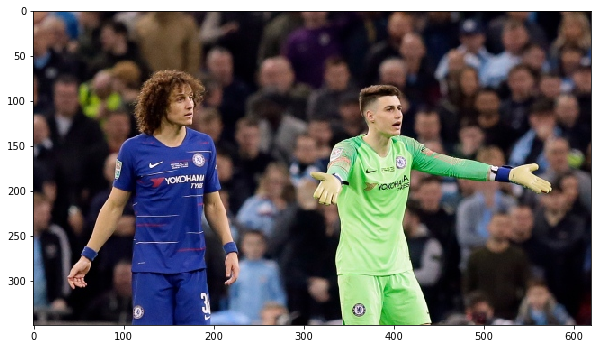

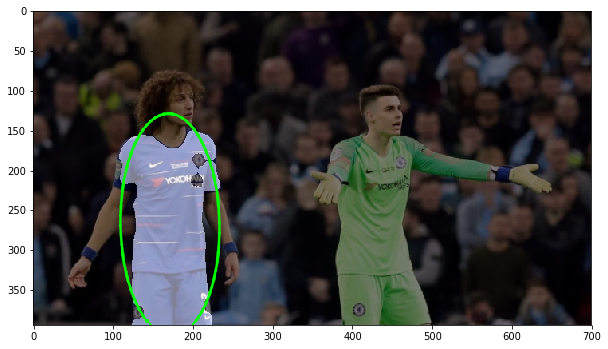

In [56]:
#read the image
image = cv2.imread('images/footballer.jpg')
image_print = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image_print)

#detect it
result = find_blue(image)
#write the new image
cv2.imwrite('images/footballer_out.jpg', result)

True

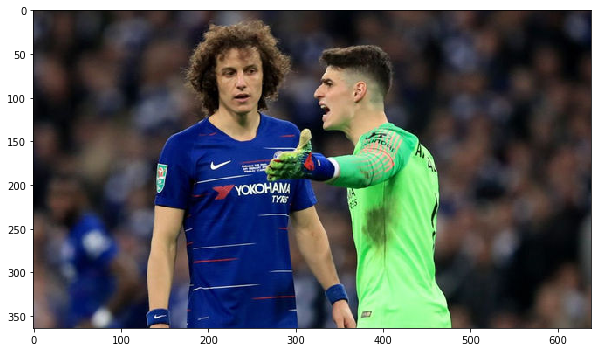

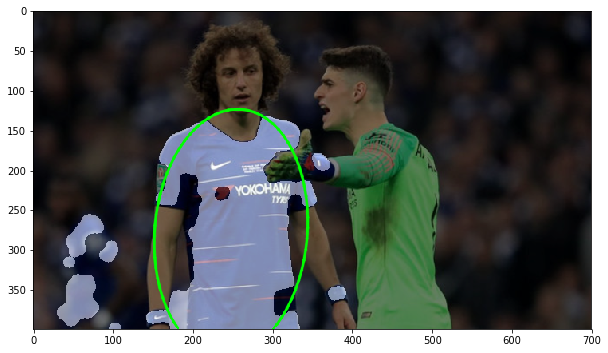

In [57]:
#read the image
image = cv2.imread('images/footballer2.jpg')
image_print = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image_print)

#detect it
result = find_blue(image)
#write the new image
cv2.imwrite('images/footballer2_out.jpg', result)